Questão 2

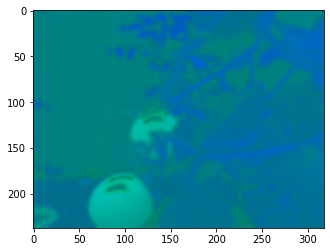

In [48]:
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

#mg = cv.imread('yellowtargets.png')
img = cv.imread('tomato_124.jpg')
# img = cv.imread('gonzalez-flower.png')
img = cv.cvtColor(img, cv.COLOR_BGR2LAB)
img[:,:,0] = 0

img.shape
plt.imshow(img)

In [49]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
vectorized.shape

(75684, 3)

In [52]:
attempts = 100
K = 3
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#Opencv
ret, label, center = cv.kmeans(vectorized, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

#Sklearn
# kmeans = KMeans(n_clusters=2, random_state=0).fit(vectorized)
# label = kmeans.labels_
# center = kmeans.cluster_centers_

center = np.uint8(center)

res = center[label.flatten()]

print(label.shape)

(75684, 1)


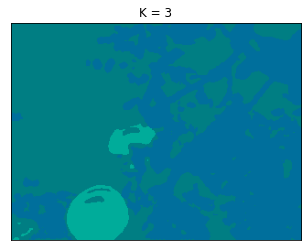

In [53]:
result_image = res.reshape((img.shape))

plt.imshow(result_image)
plt.title('K = ' + str(K))
plt.xticks([])
plt.yticks([])
plt.show()